# Visulization
Author: **Shiming Luo**<br>
This is the part of visualization of our project, including some pre-processing of cleaned data.

## Gun Shot data

In [61]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.plotly as py
import os
import re
import locale
from locale import atof
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def prepGunshotData(df):
    '''
    Pre-processing of gunshot data, including add the abbreviation of each state and convert Poverty 
    rate to float type.
    
    :@param df: pandas.core.frame.DataFrame, the input data.
    :@return df: pandas.core.frame.DataFrame, processed output data.
    '''
    import pandas
    
    assert isinstance(df, pandas.core.frame.DataFrame), 'The input data is not a DataFrame.'
    
    us_state_abbrev = {
        'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
        'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
        'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
        'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
        'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
        'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
        'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
        'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
        'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
    }
    try:
        df['Poverty rate'] = df['Poverty rate'].str.rstrip('%').astype('float') / 100.0
    except:
        raise ValueError, 'Cannot do Poverty rate convert'
    try:
        df.insert(loc=0, column='code', value=[us_state_abbrev[i] for i in df['State']])
    except:
        raise ValueError, 'Missing value'
        
    assert isinstance(df, pandas.core.frame.DataFrame), 'The input data is not a DataFrame.'
        
    return df

Read and plot the gunshot data

In [3]:
df_gunshot = pd.read_csv('../data/gunshot.csv')
df_gunshot = prepGunshotData(df_gunshot)
df_gunshot

,code,State,"Firearm deaths per 100,000 people",Poverty rate,Permit required to carry handgun,Violent crime rate,Total firearm deaths 2016
0,MS,Mississippi,19.8,0.208,No,280.5,587
1,OK,Oklahoma,19.6,0.163,Yes,449.8,766
2,DE,Delaware,10.9,0.117,Yes,508.8,111
3,MN,Minnesota,7.6,0.099,Yes,242.6,432
4,AK,Alaska,23.0,0.099,No,804.2,177
5,IL,Illinois,11.6,0.130,FOID,436.3,1490
6,AR,Arkansas,17.7,0.172,Yes,550.9,541
7,NM,New Mexico,18.2,0.198,Yes,702.5,383
8,OH,Ohio,12.9,0.146,Yes,300.3,1524
9,IN,Indiana,14.9,0.141,Yes,404.7,997


Using Python module sns to seek the realationship between different items.

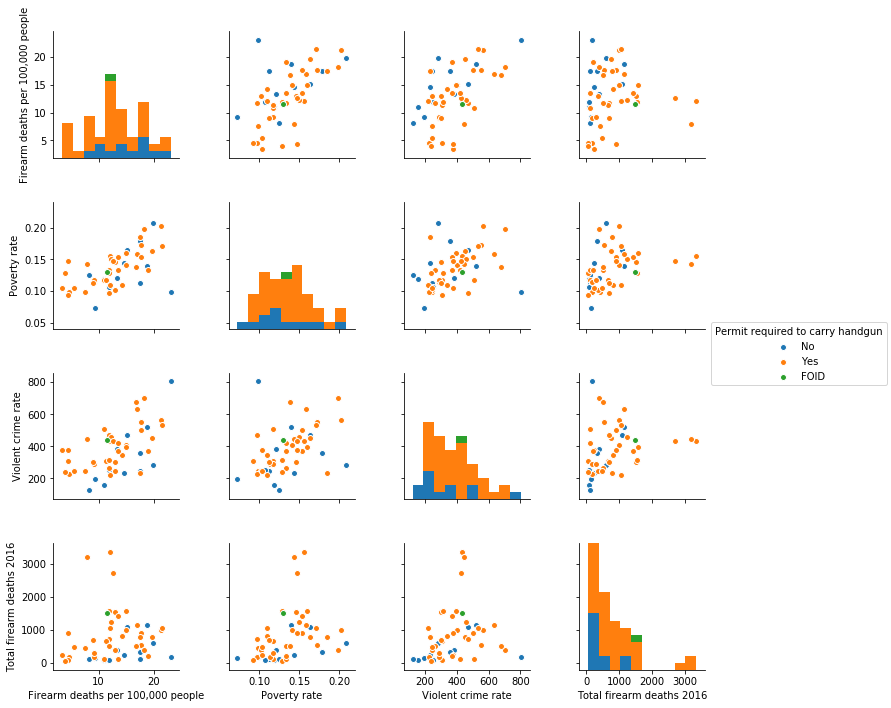

In [5]:
pair_plot = sns.pairplot(df_gunshot, hue = 'Permit required to carry handgun')
pair_plot.savefig('figure/PairPlot.png')

Using the heatmap to describe the data.

In [6]:
def mapPlot(df, item):
    '''
    Generate a heatmap over the American map by using module plotly. The function plotly.plotly.iplot in plotly 
    can identify the abbreviation (called 'code' in the data) of each state in America, so it is uesd to assign 
    values of item to corresponding states.
    
    :@prama df: pandas.core.frame.DataFrame, input data.
    :@param item: string, the column of the data that need to be plot.
    :@return res: plotly.tools.PlotlyDisplay, the heatmap.
    '''
    import pandas
    
    assert isinstance(df, pandas.core.frame.DataFrame), 'The input data is not a DataFrame.'
    assert isinstance(item, str), 'The input item is not a string.'
    
    
    for col in df.columns:
        df[col] = df[col].astype(str)
    
    ### color scale
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
                [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

    try:
        data = [ dict(
                type='choropleth',
                colorscale = scl, ### setting color scale
                autocolorscale = False,
                locations = df['code'], ### locate the rows to corresponding states
                z = df[item].astype(float), ### determine the item we wanna plot
                locationmode = 'USA-states', ### chose the map model
                marker = dict(line = dict ( color = 'rgb(255,255,255)',
                                            width = 2 ) ) ) 
               ]
    except:
        raise ValueError,'Cannot convert the data in require column.'

    layout = dict(
            title = '2016 US {}'.format(item),
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    res = py.iplot( fig, filename='d3-cloropleth-map' )
    
    assert isinstance(res,plotly.tools.PlotlyDisplay)
    
    return res

The heatmap can be generated on any column that is only contains numerical values.

In [7]:
### api_key is need for online plot
plotly.tools.set_credentials_file(username='shl666', api_key='63b9Xz7eRm7yqi5GrSK2')
heatmap_deaths = mapPlot(df_gunshot, 'Firearm deaths per 100,000 people')
heatmap_deaths

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shl666/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


The interactive heatmap is not able to be seen on the github preview. So we saved it as a png file and plot it by module matplotlib.

In [82]:
def plotPng(fname):
    '''
    Plot .png file.
    
    :@param fname: string, file name, end with '.png'
    '''
    
    assert isinstance(fname,str), 'The input fname need to be a string.'
    assert fname[-4:] == '.png', 'The input fname need to be ended with .png'
    
    try:
        img=mpimg.imread(fname)     ### read file
        plt.figure(figsize=(20,20)) ### set the size to 20inch*20inch
        plt.axis('off')             ### remove axis
        plt.imshow(img)             ### plot figure
    except:
        raise ValueError,'The {} can not be plotted.'.format(fname)

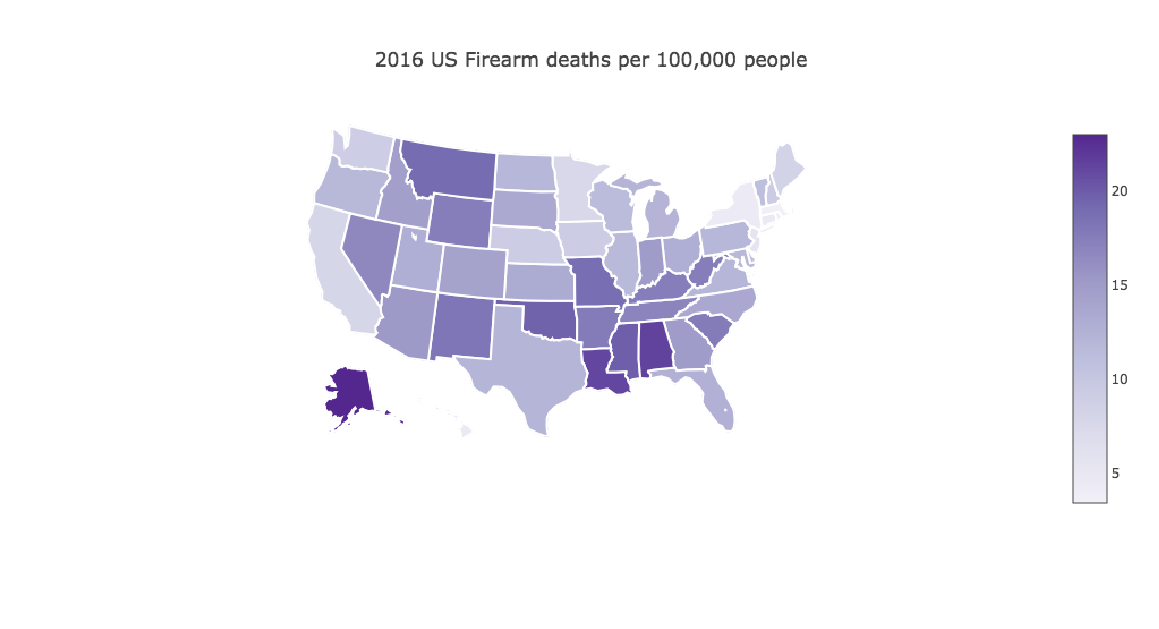

In [83]:
plotPng('figure/heatmap_deaths.png')

When we plot the heap map for Permit required to carry handgun, we need to convert the value first.

## Mental Health data
The mental health data is seperated in 52 .csv files, we need to merge them into one file and then do the visualizaition.

In [57]:
def merge2one(in_path,out_path):
    '''
    Merge the small .csv files into one.
    
    :@param in_path:str, the path to the data file directory
    :@param out_path:str, the path of the output file
    '''
    
    assert isinstance(in_path, str) and isinstance(out_path, str)
    
    ### get the list of file names
    try:
        csv_lst = os.listdir(in_path)
    except:
        raise ValueError, 'Can not get the data files.'
        
    ### state's name to abbrevation dictionary    
    us_state_abbrev = {
        'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
        'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
        'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
        'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
        'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
        'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
        'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
        'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
        'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
    }
        
    ### merge file
    dfs = [] ### the list of sub data frames
    for i in xrange(len(csv_lst)):
        file_name = csv_lst[i]
        state = ' '.join(re.sub( r"([A-Z])", r" \1", file_name[3:-19]).split()) ### get the state's name
                                                                               ### e.g. 'TheAlabamaPercentageTable.csv' -> 'Alabama'
        if state not in us_state_abbrev:  ### skip the file if the state's name is not in the dictionary
            continue
        df = pd.read_csv(in_path+file_name)  ### read file
        df.loc[5]=['State',state] ### add 'State' row
        df = df.rename(columns={'Measure':'idx', '18+':i}) ### rename the column, prepare to be index
        df = df.set_index('idx',inplace=False) ### change index and transpose
        df = df.T
        dfs.append(df)
    df = pd.concat(dfs) ### merge sub data frames
    df.insert(loc=0, column='code', value=[us_state_abbrev[i] for i in df['State']]) ### add the 'code' column for heatmap plotting
    
    ### save it to a new .csv file
    assert out_path[-4:] == '.csv', 'The extension of output file is not .csv'
    df.to_csv(out_path)

In [58]:
### the path of metal health data
in_path = "../data/mental_health_percentage/"
out_path = '../data/mental_health_percentage.csv'

### merge the sub files into one
merge2one(in_path,out_path)

### read data
df_mh = pd.read_csv(out_path)
df_mh

,Unnamed: 0,code,Serious Mental Illness,Any Mental Illness,Received Mental Health Services,Had Serious Thoughts of Suicide,Major Depressive Episode,State
0,0,AL,4.23,18.47,12.98,3.57,6.66,Alabama
1,1,AK,4.53,20.01,13.54,5.15,7.39,Alaska
2,2,AZ,4.04,17.52,11.87,4.01,6.03,Arizona
3,3,AR,5.45,21.02,15.54,4.47,8.13,Arkansas
4,4,CA,3.61,17.15,11.59,3.96,6.04,California
5,5,CO,4.61,20.05,15.86,4.88,7.62,Colorado
6,6,CT,3.59,18.00,17.05,3.76,6.84,Connecticut
7,7,DE,4.23,17.71,15.06,4.35,6.52,Delaware
8,9,FL,3.56,17.30,12.75,3.34,6.12,Florida
9,10,GA,4.17,17.74,12.03,3.94,6.72,Georgia


Sometimes some of the values in it are string and contains comma. We need do some proces to it. (optional)

In [60]:
def lc2num(df,item):
    '''
    Convert the string that contains comma to float.
    :@prama df: pandas.core.frame.DataFrame, input data frame.
    :@prama item: str, the column that need to convert
    :@return df_new: pandas.core.frame.DataFrame, output data frame with converted column
    '''
    import pandas
    
    assert isinstance(df, pandas.core.frame.DataFrame), 'The input data is not a DataFrame.'
    assert isinstance(item, str), 'The input item need to be a string.'
    assert item in [i for i in df], 'The input item is not the name of a column'
    
    ### way to change string with comma to float
    locale.setlocale(locale.LC_NUMERIC, '') 

    ### generate new data frame
    df_converted = df_mh[[i for i in df_mh][item]].applymap(atof)### change string with comma to float
    del df[item]

    df_new = pd.concat([df_mh_1,df_mh_2,df_mh_3],axis=1) ### merge
    assert isinstance(df_new, pandas.core.frame.DataFrame), 'The output data is not a DataFrame.'
    
    return df_new

In [59]:
heatmap_SMI = mapPlot(df_mh, 'Serious Mental Illness')
heatmap_SMI

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shl666/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


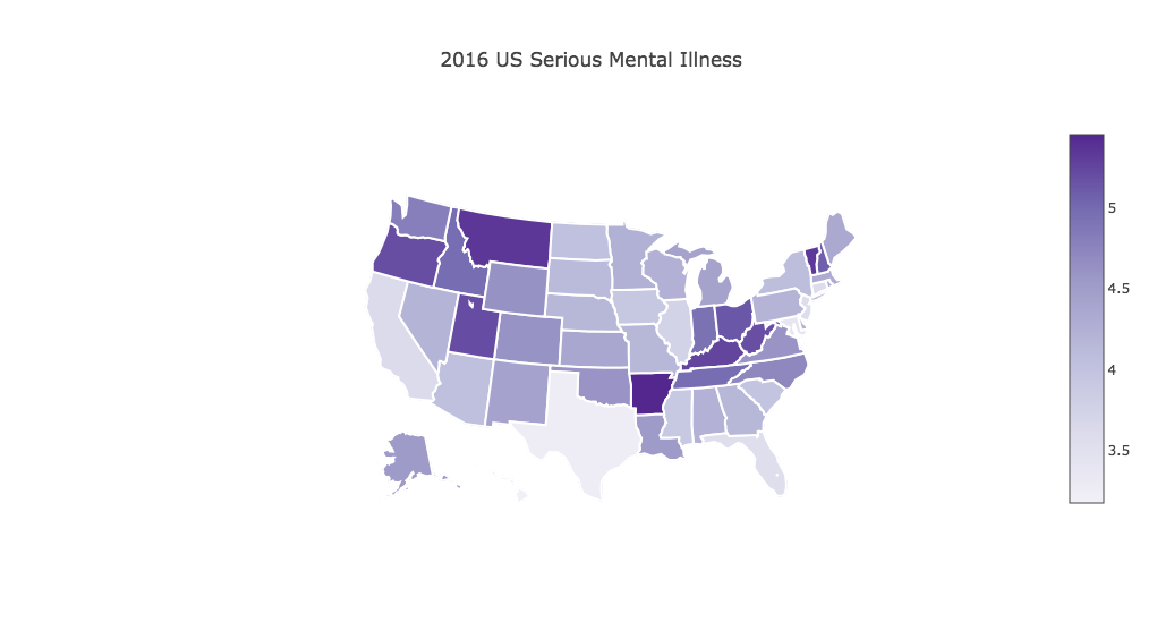

In [85]:
plotPng('figure/heatmap_SMI.png')